<center>
    <a href="360_F_332551797_pmurjTjrSuR5qqdeol2RvHKrWEqnvfXa.jpg"><img src = "360_F_332551797_pmurjTjrSuR5qqdeol2RvHKrWEqnvfXa.jpg" width = 1000> </a>
</center>

# NASA - 500 years of Mysterious Lunar Anomalies

Dataset: Moon Records retrieved dataset from [Data.world] 

## Objectives

Find Lunar anomalies throughout the years that were recorder by different Astronomers. 

*   Create Models
*   Evaluate the models

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Understanding the Dataset Recap](#0)<br>
2.  [Understanding what model to pick](#2)<br>
3.  [Model Evaluation](#4)<br>

</div>
<hr>


# Understanding the Dataset Recap <a id="0"></a>

The dataset is a collection of the lunar anomalies between the years 1540 and 1967. R-277 is a document released by NASA which lists mysterious anomalies on the moon as observed by the astronomers.
There are 6 features in the dataset, namely:

<div class="alert alert-danger" style="margin-top: 20px">

<ul>
  <li>Year</li>
  <li>Month</li>
  <li>Description</li>
  <li>Day</li>
  <li>Credit</li>
    
</ul>  


# Dataset: Importing the dataset preparing to detection anomalies <a id="0"></a>

In [2]:

import pandas as pd
moon= pd.read_csv("moon.csv")

In [3]:
moon.head()

,Year,Month,Day,Location,Description,Credit
0,1540,Nov,26,Region of Calippus,Starlike appearance on dark side,Observers at Worms
1,1587,Mar,5,Dark Side,A sterre is sene in the bodie of the moon vpon the (blank) of Marche-whereat many men merueiled-and not without cause-for it stode directly betwene the pointes of her hornes-the mone being chaunged-not passing 5 or 6 daies before.,Anonymous
2,1668,Nov,26,Dark Side,Bright starlike point,Several New Englanders
3,1671,Oct,21,Pitatus,NaN,NaN
4,1671,Nov,12,Pitatus,Small whitish cloud,D.Cassini


Although people know a lot about the moon, some things just don't add up. 
The research is to develop hypotheses, present arguments and debate possible solutions to one of the following four questions:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<ul>
  <li>Why does the moon have fewer moonquakes than Earth has earthquakes?</li>
  <li>Why are no volcanoes on the moon?</li>
  <li>Why does the farside of the moon have fewer maria than the nearside?</li>
  <li>Why does the moon have a weaker magnetic field than Earth?</li>
    
</ul>  



<a>https://www.nasa.gov/stem-ed-resources/moon-anomalies.html</a>

# Understanding what model to pick <a id="0"></a>

Detect lunar anomalies by using Object Detection, 


# Statistical analysis<a id="0"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('041119-moon.jpg')
mean_intensity = np.mean(img)
std_dev = np.std(img)

print("Mean intensity:", mean_intensity)
print("Standard deviation:", std_dev)

# Image segmentation<a id="0"></a>

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("041119-moon.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a rectangle around each contour
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow("Segmented Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Edge detection<a id="0"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature

img = io.imread('041119-moon.jpg')
img = color.rgb2gray(img)
edges = feature.canny(img, sigma=3)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(edges, cmap='gray')
plt.show()

# Template matching<a id="0"></a>

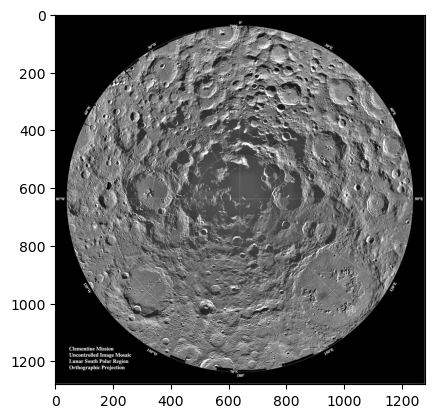

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('craters.jpg', 0)
template = cv2.imread('041119-moon.jpg', 0)

if img is None or template is None:
    print("Error reading image file.")
else:
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    threshold = 0.8
    loc = np.where(result >= threshold)

    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)

    plt.imshow(img, cmap='gray')
    plt.show()